## EE-361M Introduction to Data Mining
## Assignment #2
## Due: Thursday, Feb 18, 2016 by 2pm; Total points: 50


Your homework should be written in a **Jupyter notebook** (if this isn't possible, let me know). Please use this naming format for your notebook you submit: **Group(Group Num)_HW(HW Number).ipynb**. For example, Group1_HW1.ipynb. Homeworks are due at the beginning of class on the due date and should be submitted through Canvas in your **groups of 3 from the first homework**. If groups need to be adjusted please contact the TA.

## Question 1: Sampling
### 10 points

1. CBS has come up with an extreme TV show, and each of its viewers either likes or hates it. (no middle ground here; we are in a 'black and white age'). CBS wants to estimate what fraction $p$ of its audience like the show by 'randomly' calling $n$ viewers and tallying their responses so as to estimate the true value of $p$ to a fractional  accuracy of within $\pm \epsilon$%, with a confidence of $(1-\alpha) \times 100$%. For $\alpha =  0.1$, $\epsilon = 0.02$ (i.e. your answer will be $\hat{p} \pm 0.02$), what is the minimum value of $n$ needed if (i) true value $p = 0.5$ and (ii) $p = 0.95$? 
%(First try to do this yourself knowing that you have a binomial distribution, which can be approximated by a normal distribution. If you cannot, consult an undergrad stats book.)

i) for $p=0.5$
    $p = 0.5$
    $n>= 0.5(0.5)(1.65/0.02)^2$
    $n>= 1701.56$
    Must Sample at least 1702 People
    
ii) for $p = 0.95$
    $n>= 0.95*0.05*(1.65/0.02)^2$
    $n>= 323.297$
    Must sample at least 324 People
    

2. Suppose for a certain value  of $p$ and choice of $\epsilon$, you calculate that you will need (at least) 1000 samples for $\alpha = 0.1$. You now decide to obtain  a more accurate answer by either (i) reducing $\alpha$ to 0.05, keeping the same $\epsilon$ or by (ii) reducing $\epsilon$ by a factor of 2 from the original value, but maintaining  $\alpha = 0.1$.  In each case how many samples would you need now?

Using n >= p(1-p) (zα/2 / ε ) 2
i) we change z$\alpha/2$ to 1.96 which will increase our output by 1.41 so we would need 1412 samples (using 4 decimal places)
ii) reducing epsilon by a factor of 2 changes the output by a factor of 4 so we need 4000 people

## Question 2: Republican Presidental Debate
### 10 points

In this question we will be analyzing text data from one of the recent presidental debates. I have included code below to grab the data for you from the New York Times.

1. Create a set of the frequency of utterance of  all the distinct words spoken by candidates, and then use it to create a histogram (with 30 bins) of word counts. Thus a bin is a range of count values and the corresponding "y" value is the number of words whose count falls in this range. What is interesting about this distribution? What are the 10 most common words?
2. Remove the 100 most common words from vocabulary. Meaning that if you ever see this word, get rid of it. Now create a new python dictionary for each candidate that is a single list of all the words spoken by this candidate (ignoring these most common words). What are the 10 most common words for Trump, Rubio, and Cruz? How do their words differ?
3. Using our dictionary from number 2, how many words did each speaker speak? Who spoke the most? Who is the outlier?
4. Count the percentage of time each person uses the words (I, I'm, me, mine). When doing this convert all words to lower case. Create a bar plot of this percentage for each candidate with bars from largest to smallest. Use dictionary that has all words (doesn't exclude most common). What does the plot show?

Hints:
1. Look at python Counter.
2. Just split text on a space. This isn't perfect, but will be fine.

In [1]:
import requests
from bs4 import BeautifulSoup
from collections import defaultdict

url = 'http://www.nytimes.com/2015/11/11/us/politics/transcript-republican-presidential-debate.html'
# requests gets the source code from the url and extracts it as text
html = requests.get(url).text
# beautifulsoup is a library that takes in text source code and returns a structured format of that
# source code that you can more easily search and parse.
soup = BeautifulSoup(html, 'html5lib')
# get all the 'p' tags from the source with class = 'story-body-text'
# this was determined by looking at the source code
# the first and last paragraphs are intro and ending
paragraphs = soup('p', {'class': 'story-body-text'})[1:-1]
candidates = ['BUSH', 'TRUMP', 'RUBIO', 
              'CARSON', 'FIORINA', 'KASICH', 'CRUZ', 'PAUL']

def text_to_dict(paragraph_array):
    '''takes an array of text paragraphs from debate and returns dict 
    where key is person and value is list of text spoken by that candidate'''
    # dict is like a hash map. defaultdict lets you specify what types of values will be in your hash map
    d = defaultdict(list)
    # just a default speaker that won't end up in our returned data
    # will get replaced when an actual speaker is found
    speaker = "<START>"
    for paragraph in paragraph_array:
        words = paragraph.text.split(' ')
        first_word = words[0]
        # only new speaker when have SPEAKER: format
        if first_word[-1] == ":":
            speaker = first_word[:-1]
        # only keep candidates text
        if speaker in candidates:
            d[speaker].append(words[1:])
    return d

speaker_dict = text_to_dict(paragraphs)

In [2]:
from collections import Counter
import re
words_to_count = (word for word in speaker_dict['TRUMP'])
c = Counter(words_to_count)
print(c.most_common(30))
#words = re.findall(r'\w+', speaker_dict)

#Counter(words).most_common(30)
#c = collections.Counter()
#print('Most common:')
#print(collections.Counter('TRUMP').most_common(30))

#for letter, count in c.most_common(30):
#    print('%s: %7d',letter,count)
#speaker_dict['TRUMP']

TypeError: unhashable type: 'list'

In [ ]:
speaker_dict['TRUMP']

## Queston 3: Principal Component Analysis
### 15 points

In this question, you will explore an application of PCA.

1. Convert your data from 3.2 to a vectorized format. This means you will have a row for each candidate and a column for each word in your data. A column for a candidate will contain the number of times that candidate used that word. Use [CountVectorizer](http://scikit-learn.org/stable/modules/feature_extraction.html) from sklearn with min_df = 1.
2. Convert your data from a sparse matrix to a dense array using .toarray() and then scale it to have mean zero and standard deviation of 1. See [here](http://scikit-learn.org/stable/modules/preprocessing.html) for help.
2. Plot the explained variance as a function of the number of PCA components (called a scree plot). Use sklearn's PCA functionality to do this.
3. Now pick the top two principal components and project the data onto the respective dimensions. Visualize the data in a scatter plot and label each point with the candidate's name. Who are the outliers? Use sklearn and matplotlib for this. 
4.  In what sense is PCA an optimal feature extraction technique? Describe a situation where you would prefer feature selection to (linear) feature extraction, even though the former  is a special case of the latter.

## Question 4: Robust Regression
### 5 points

In this question we will be exploring using a regression technique that is more robust to outliers. I provide some code below that injects outlier points into the original medv and lstat data from the housing dataset. This problem looks into how robust regression can help in the presence of outliers.

1. Using the original data, plot lstat on the x-axis and log(medv) on the y-axis of a scatter plot with the line of best fit from a linear regression on the plot as well. Do the same, but with the data that includes the outlier values. What changes with the best fit line? Specifically, how does the slope change?
2. Now run a linear regression with a Huber loss on the data including the outliers and create the same plot as above, but this time with the fit from the Huber loss regression (using all the data). What has changed (comment on the slope as well)? Note: Use SGDRegressor from sklearn with 500 iterations and no penalty.
3. Explain why the huber loss is more robust to outliers.

Note:  Use plot's with xlim = (-5, 40) and ylim = (1, 5). These set the range for the x any y axes.

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style='ticks', palette='Set2')
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

%matplotlib inline

housing_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data",
                   delim_whitespace=True, header=None,
                   names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
                           'B', 'LSTAT', 'MEDV'])
housing_data = housing_data.dropna()
lstat = housing_data.LSTAT.values
medv = housing_data.MEDV.values
medv_std = np.std(medv)
lstat_std = np.std(lstat)
np.random.seed(42)
medv_outliers = np.random.normal(1, 1, 5)
lstat_outliers = np.random.normal(1, 1, 5)
medv_with_outliers = np.append(medv, medv_outliers)
lstat_with_outliers = np.append(lstat, lstat_outliers)

[(1, 5), (-5, 40)]

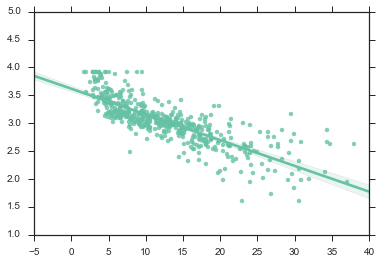

In [8]:
sns.regplot(lstat, np.log(medv)).set(xlim=(-5, 40), ylim=(1, 5))

[(1, 5), (-5, 40)]

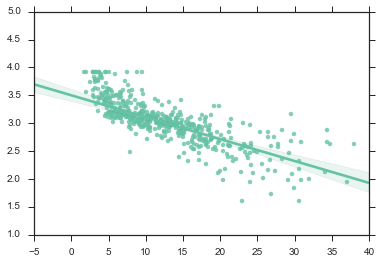

In [9]:
sns.regplot(lstat_with_outliers, np.log(medv_with_outliers)).set(xlim=(-5, 40), ylim=(1, 5))

### The line of best fit becomes more flat (less of a negative slope) when the outliers are included. Specifically, the y-intercept of the line is pulled down in the outlier inclusive plot.

[(1, 5), (-5, 40)]

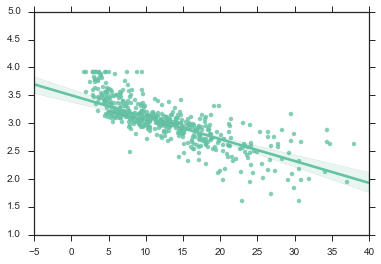

In [10]:
clf = linear_model.SGDRegressor(loss = 'huber', n_iter=500, penalty= None)
clf.fit(lstat_with_outliers.reshape(-1, 1), np.log(medv_with_outliers))
#sns.regplot(clf.x, clf.y).set(xlim=(-5, 40), ylim=(1, 5))
#clf.coef_
#LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
sns.regplot(lstat_with_outliers, np.log(medv_with_outliers)).set(xlim=(-5, 40), ylim=(1, 5))


### Huber loss is more robust towards outliers because it gives them less influence in the sum squared error, which results in better fit for the majority of the data points. It does this by not squaring the residuals of outliers after a given cutoff, which allows the sum squared error to remain small.

# Question 5: Visualization using Bokeh
## 10 points

In this problem, you'll build an interactive visualization. Bokeh is a Python interactive visualization library that targets modern web browsers for presentation. For more information on Bokeh, see http://bokeh.pydata.org/en/latest/. The problem statement is as follows:

Using the [auto-mpg](http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original) data, your goal is to build a Bokeh visualization which allows the user explore how MPG varies with horsepower and weight. You will create a visualization that allows the user to toggle the Y axis of a scatter plot between horsepower and weight. With the x-axis always being MPG.

Hints: 
1. You can make use of Select widgets.
2. See: http://bokeh.pydata.org/en/latest/docs/user_guide/interaction.html#javascript-callbacks. Specifically look at the CustomJS for Widgets under Callbacks and the Select widget. 
3. See: http://bokeh.pydata.org/en/latest/docs/reference/plotting.html. Look for the scatter API.
4. See: http://bokeh.pydata.org/en/0.10.0/docs/user_guide/styling.html#labels. For labeling axes.
5. Use output_notebook() from Bokeh to output the plot to your notebook

We have made available a sample screenshot of our Bokeh app that supports the above requirements. Your interface should look similar to the screenshots.

In [ ]:
from bokeh.io import output_file, show, vform, output_notebook
from bokeh.models import CustomJS, ColumnDataSource
from bokeh.models.widgets import Select
from bokeh.plotting import Figure, show, output_file
import pandas as pd

output_notebook()    

autompg_data = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original",
                           delim_whitespace=True, header=None,
                          names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration',
                                   'model year', 'origin', 'car name'])
mpg = autompg_data.mpg.values
horsepower = autompg_data.horsepower.values
weight = autompg_data.weight.values
autompg_data.dropna()

graph = Figure(plot_width=400, plot_height=400)
graph.xaxis.axis_label = "MPG"
source = ColumnDataSource(data=dict(x1=horsepower, x2=weight, y=mpg))
graph.scatter('x1', 'y', source=source)

callback = CustomJS(args=dict(source=source), code="""
        var data = source.get('data');
        var temp = data['x1']
        data['x1'] = data['x2']
        data['x2'] = temp
        source.trigger('change');
    """)

y_select = Select(title="Y Variable", options=["Horsepower", "Weight"], callback=callback)
show(vform(y_select, graph))
